<h3 style='color:blue' align='center'>Customer Churn Prediction Using Artificial Neural Network (ANN)</h3>

In [128]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from fast_ml.model_development import train_valid_test_split
import seaborn as sn
from sklearn.metrics import confusion_matrix , classification_report
%matplotlib inline

**Load the data**

In [129]:
df = pd.read_excel('datasets/E_Commerce_Dataset.xlsx',sheet_name ='E_Comm')
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4483,54484,1,1.0,Mobile Phone,1,9.0,Credit Card,Male,3.0,6,Mobile Phone,1,Married,7,1,14.0,2.0,3.0,3.0,159.64
2813,52814,0,22.0,Computer,3,8.0,Credit Card,Male,3.0,4,Laptop & Accessory,4,Married,3,0,14.0,1.0,1.0,8.0,153.90
463,50464,0,23.0,Mobile Phone,1,8.0,Credit Card,Male,3.0,3,Grocery,3,Divorced,6,0,16.0,NaN,1.0,3.0,276.39
4502,54503,0,5.0,Mobile Phone,1,14.0,Credit Card,Female,3.0,4,Fashion,1,Single,3,1,15.0,5.0,5.0,11.0,196.43
5226,55227,0,7.0,Mobile Phone,1,11.0,Credit Card,Female,3.0,5,Mobile Phone,4,Married,10,0,12.0,2.0,2.0,3.0,163.38


In [130]:
category_count = df['Churn'].value_counts()
categories = category_count.index

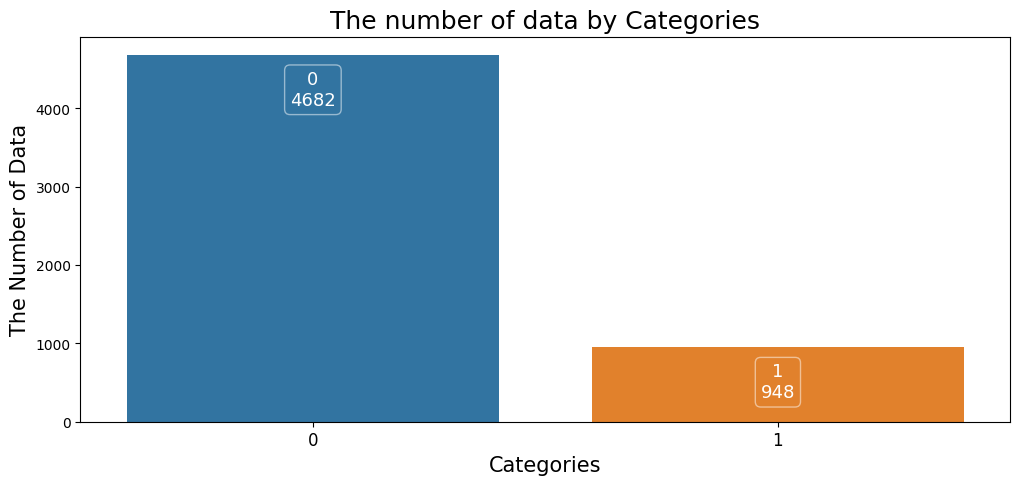

In [131]:

fig = plt.figure(figsize= (12, 5))

ax = fig.add_subplot(111)

sns.barplot(x = category_count.index, y = category_count )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )
    
plt.xlabel('Categories', size = 15)

plt.ylabel('The Number of Data', size= 15)

plt.xticks(size = 12)

plt.title("The number of data by Categories" , size = 18)

plt.show()

**First of all, drop customerID column as it is of no use**

In [132]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

**Unique values**

In [133]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [134]:
print_unique_col_values(df)

PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer']
PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender: ['Female' 'Male']
PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus: ['Single' 'Divorced' 'Married']


# Label Encoding

In [135]:
df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

# One-Hot Encoding

In [136]:
df = pd.get_dummies(df)
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_CC', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

In [137]:
df.sample(5)

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1872,51873,0,5.0,3,16.0,1,2.0,3,1,2,...,0,0,0,1,0,0,0,0,0,1
157,50158,0,2.0,3,8.0,1,2.0,3,2,2,...,0,0,0,1,0,0,0,0,0,1
268,50269,0,7.0,3,10.0,0,3.0,3,3,10,...,0,0,0,1,0,0,0,1,0,0
262,50263,0,13.0,3,8.0,0,2.0,3,4,8,...,0,0,0,1,0,0,0,0,1,0
4779,54780,0,7.0,3,7.0,1,3.0,2,5,3,...,0,0,0,1,0,0,0,0,1,0


In [138]:
nan_count = df.isna().sum().sum()
print(nan_count )

1856


# Data Imputaion

In [139]:
df.fillna(df.median(), inplace=True)

# Feature Scaling

In [140]:
cols_to_scale = ['CashbackAmount', 'Tenure', 'WarehouseToHome' ]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Undersampling

In [141]:
#Undersampling to handle class imbalance
def Under_Sampling(df):
  df_pos = df[df['Churn'] == 1]
  df_neg = df[df['Churn'] == 0]
  msk = np.random.rand(len(df_neg)) < 0.25
  print (len(msk))
  df_neg_sample = df_neg[msk]
  df_sample_data = pd.concat([df_pos,df_neg_sample])
  df_sample_data = df_sample_data.sample(frac=1).reset_index(drop=True)
  return df_sample_data


df = Under_Sampling(df)  


4682


In [142]:
category_count = df['Churn'].value_counts()
categories = category_count.index

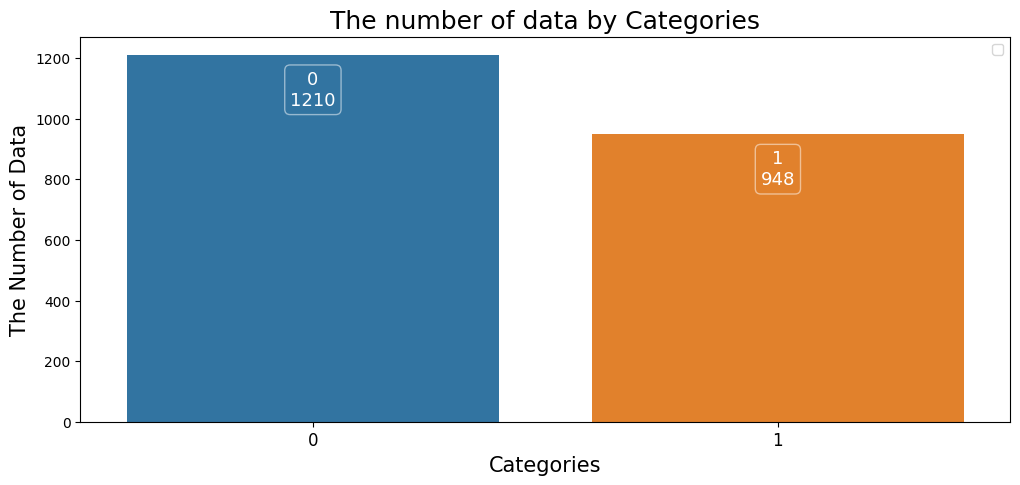

In [143]:
fig = plt.figure(figsize= (12, 5))

ax = fig.add_subplot(111)

sns.barplot(x = category_count.index, y = category_count )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )
    
plt.xlabel('Categories', size = 15)

plt.ylabel('The Number of Data', size= 15)

plt.xticks(size = 12)

plt.title("The number of data by Categories" , size = 18)

plt.legend()

plt.show()

# Train-Test split

In [144]:
drop_cols = ['CustomerID']
# y = df['Churn']

df = df.drop(drop_cols,axis=1)
# y = df['Churn']

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'Churn', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(1726, 33)
(1726,)
(216, 33)
(216,)
(216, 33)
(216,)


(None, None)

In [145]:
X_train.shape

(1726, 33)

In [146]:
X_test.shape

(216, 33)

In [147]:
len(X_train.columns)

33

# Model Building and Training

In [116]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(33,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=150, validation_data=(X_valid, y_valid))

Epoch 1/150
55/55 [==============================] - 2s 8ms/step - loss: 1.9821 - accuracy: 0.5587 - val_loss: 0.7081 - val_accuracy: 0.6065
Epoch 2/150
55/55 [==============================] - 0s 7ms/step - loss: 0.7198 - accuracy: 0.5477 - val_loss: 0.6766 - val_accuracy: 0.5648
Epoch 3/150
55/55 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5442 - val_loss: 0.6725 - val_accuracy: 0.5741
Epoch 4/150
55/55 [==============================] - 0s 4ms/step - loss: 0.6807 - accuracy: 0.5870 - val_loss: 0.6524 - val_accuracy: 0.6435
Epoch 5/150
55/55 [==============================] - 0s 5ms/step - loss: 0.6663 - accuracy: 0.6200 - val_loss: 0.6358 - val_accuracy: 0.6435
Epoch 6/150
55/55 [==============================] - 0s 4ms/step - loss: 0.6540 - accuracy: 0.6374 - val_loss: 0.6218 - val_accuracy: 0.6713
Epoch 7/150
55/55 [==============================] - 0s 6ms/step - loss: 0.6399 - accuracy: 0.6657 - val_loss: 0.6002 - val_accuracy: 0.6806
Epoch 8/150
5

# Result Analysis

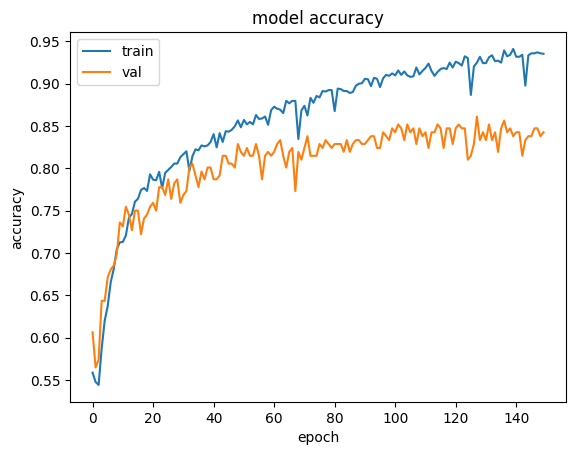

In [117]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

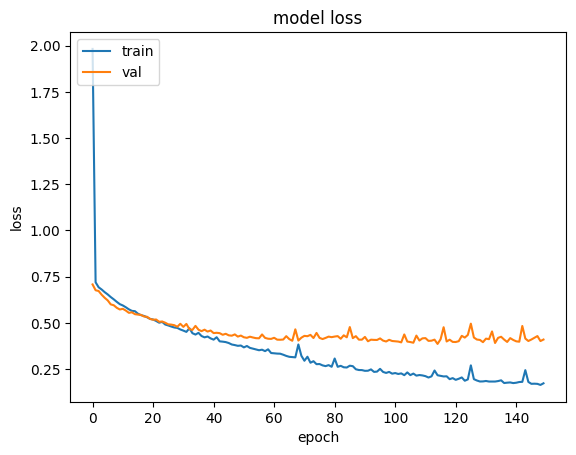

In [118]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model Performance Evaluation

In [119]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4135 - accuracy: 0.8802


[0.41347017884254456, 0.8801843523979187]

In [120]:
yp = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [121]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [122]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       116
           1       0.89      0.84      0.87       101

    accuracy                           0.88       217
   macro avg       0.88      0.88      0.88       217
weighted avg       0.88      0.88      0.88       217



Text(95.72222222222221, 0.5, 'Truth')

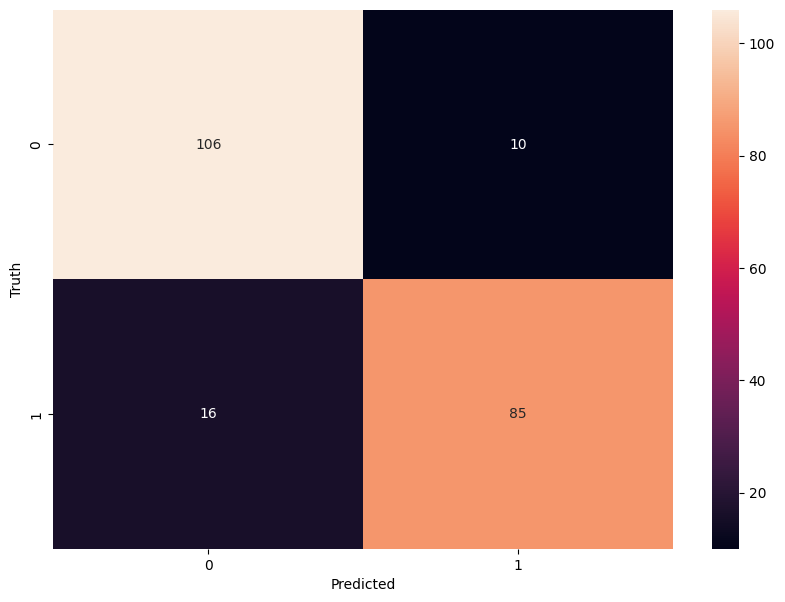

In [123]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [124]:
y_test.shape

(217,)